# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### Start the Environment

We begin by importing some necessary packages. If the code cell below returns an error, check the README file if all the environment is configured correctly.

In [1]:
# This magic code below is used to avoid the need to reimport files if they are edited externally.
%load_ext autoreload
%autoreload 2

# Show plots on notebook
%matplotlib inline

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
from models import ddpg, run_single_episode, Agent, plot_result
from models.parameters import device, check_device

In [3]:
# Checkig if a GPU is avalilable
check_device()

Using device: cuda:0


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

I've downloaded both agents and extracted the single-agent environment to the folder `Reacher_Windows_x86_64_SingleAgent` and the multiple agents to folder `Reacher_Windows_x86_64`.

Please select one of the two options below for loading the environment.

In [4]:
# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='Reacher_Windows_x86_64_SingleAgent/Reacher.exe')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### Examine the State and Action Spaces

The Reacher environment are configured as described below:
- Set-up: Double-jointed arm which can move to target locations.
- Goal: The agents must move its hand to the goal location, and keep it there.
- Agents: The environment contains **1 or 20 agents** (depend on the selected environment) with same Behavior Parameters.
- Agent Reward Function (independent):
 - **+0.1** Each step agent's hand is in goal location.
- Behavior Parameters:
 - Vector Observation space: **33** variables corresponding to position, rotation, velocity, and angular velocities of the two arm Rigidbodies.
 - Vector Action space: (Continuous) Size of **4**, corresponding to torque applicable to two joints.
- Benchmark Mean Reward: **30**

Source: https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md#reacher

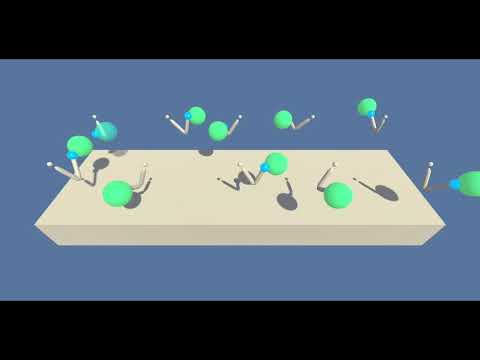

In [6]:
from IPython.lib.display import YouTubeVideo
# A video from Unity showing de reacher environment behavior
YouTubeVideo('2N9EoF6pQyE')

Run the code cell below to print some information about the selected environment.

In [7]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print(f'Number of agents: {num_agents}')

# size of each action
action_size = brain.vector_action_space_size
print(f'\nSize of each action: {action_size}')

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print(f'\nThere are {states.shape[0]} agents. Each observes a state with length: {state_size}')
print(f'\nThe state for the first agent looks like: \n{states[0]}')

Number of agents: 20

Size of each action: 4

There are 20 agents. Each observes a state with length: 33

The state for the first agent looks like: 
[ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step. A window should pop up that allows you to observe the agent, as it moves through the environment.

In [8]:
# If you want to watch the agent realize random movements, you can change the train mode to True
scores = run_single_episode(env, brain_name, train_mode=False)

print(f'Total score (averaged over agents) this episode: {np.mean(scores)}')
print(f'Each agent scores: \n{scores}')

Total score (averaged over agents) this episode: 0.17049999618902803
Each agent scores: 
[0.         0.         0.14       0.         0.15       0.
 0.31999999 0.42999999 0.         0.36999999 0.25999999 0.15
 0.55999999 0.19       0.         0.58999999 0.         0.24999999
 0.         0.        ]


## Training the agent

Let's start training an agent in this environment.

The environment is considered solved, when the average (over 100 episodes and of all agents) scores is at least **+30**. 

The function `ddpg` from `model` package is the function that will train the Deep Deterministic Policy Gradient (DDPG) model from each episode until it achieves an moving average of 30 in scores for a windows of 100 episodes.

> The Deep Deterministic Policy Gradient (DDPG) is an Actor-Critic model architecture that approximate a DQN network (actor network), but can be used for continuous action space (like the Reacher problem). The critic network helps to reduce the variance while keeps the bias to a minimum value.

The chosen architecture uses an experience replay to breaks harmful correlations between episodes and to repeat rare episodes.

- Chosen parameters:

```python
BUFFER_SIZE = int(1e6)      # replay buffer size
BATCH_SIZE = 128            # minibatch size
GAMMA = 0.99                # discount factor
TAU = 1e-3                  # for soft update of target parameters
LR_ACTOR = 6e-4             # learning rate of the actor
LR_CRITIC = 1e-3            # learning rate of the critic
WEIGHT_DECAY = 0            # L2 weight decay

LEARN_STEPS = 20            # Lear evey N steps
N_UPDATES = 10              # Number of updates that will be realize in learn step
```

The actor learning rate was increased because the network on the first training attempts was too slow to learn. After some attempts, the `6e-4` was chosen.

I used a less aggressive number of updates to keep the training more stable. Without this strategy, the agent becomes to "forget" after some episodes.

- Noise

A noise was added to the action output (actor network) to allow the training to explore more possibilities and avoid stay stuck at some point.

I had a better performance using a noise based on a Normal Distribution (with mean 0 and standard deviation 0.3) in comparison to the Ornstein-Uhlenbeck process.

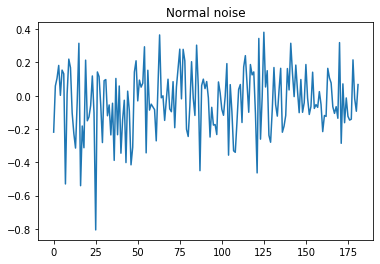

In [20]:
# Normal noise plot
plt.plot([np.random.normal(0, .3) * 0.995**i for i in range(182)])
plt.title('Normal noise');

In [10]:
# Let's start training the agent
scores, agent = ddpg(env, seed=40)

  0%|          | 0/500 [00:00<?, ?it/s]

- Actor Summary (both local and target): 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]          13,600
       BatchNorm1d-2                  [-1, 400]             800
            Linear-3                  [-1, 300]         120,300
            Linear-4                    [-1, 4]           1,204
Total params: 135,904
Trainable params: 135,904
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.52
Estimated Total Size (MB): 0.53
----------------------------------------------------------------
- Critic Summary (both local and target): 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]          13,600
       BatchNorm1d-2

  0%|          | 1/500 [00:11<1:32:23, 11.11s/it]

Episode 1	Average Score: 0.68	Last Episode Score: 0.68

  0%|          | 2/500 [00:22<1:32:07, 11.10s/it]

Episode 2	Average Score: 0.66	Last Episode Score: 0.64

  1%|          | 3/500 [00:33<1:32:00, 11.11s/it]

Episode 3	Average Score: 0.60	Last Episode Score: 0.46

  1%|          | 4/500 [00:44<1:32:01, 11.13s/it]

Episode 4	Average Score: 0.59	Last Episode Score: 0.59

  1%|          | 5/500 [00:55<1:32:12, 11.18s/it]

Episode 5	Average Score: 0.62	Last Episode Score: 0.74

  1%|          | 6/500 [01:06<1:32:04, 11.18s/it]

Episode 6	Average Score: 0.64	Last Episode Score: 0.73

  1%|▏         | 7/500 [01:18<1:32:13, 11.22s/it]

Episode 7	Average Score: 0.67	Last Episode Score: 0.87

  2%|▏         | 8/500 [01:29<1:32:21, 11.26s/it]

Episode 8	Average Score: 0.73	Last Episode Score: 1.12

  2%|▏         | 9/500 [01:41<1:32:39, 11.32s/it]

Episode 9	Average Score: 0.76	Last Episode Score: 0.96

  2%|▏         | 10/500 [01:52<1:33:03, 11.39s/it]

Episode 10	Average Score: 0.79	Last Episode Score: 1.06

  2%|▏         | 11/500 [02:04<1:33:14, 11.44s/it]

Episode 11	Average Score: 0.78	Last Episode Score: 0.66

  2%|▏         | 12/500 [02:15<1:33:34, 11.50s/it]

Episode 12	Average Score: 0.80	Last Episode Score: 1.01

  3%|▎         | 13/500 [02:27<1:33:49, 11.56s/it]

Episode 13	Average Score: 0.82	Last Episode Score: 1.16

  3%|▎         | 14/500 [02:39<1:34:28, 11.66s/it]

Episode 14	Average Score: 0.86	Last Episode Score: 1.34

  3%|▎         | 15/500 [02:51<1:34:43, 11.72s/it]

Episode 15	Average Score: 0.89	Last Episode Score: 1.24

  3%|▎         | 16/500 [03:03<1:35:10, 11.80s/it]

Episode 16	Average Score: 0.94	Last Episode Score: 1.73

  3%|▎         | 17/500 [03:15<1:36:24, 11.98s/it]

Episode 17	Average Score: 0.98	Last Episode Score: 1.65

  4%|▎         | 18/500 [03:27<1:36:36, 12.03s/it]

Episode 18	Average Score: 1.00	Last Episode Score: 1.40

  4%|▍         | 19/500 [03:40<1:37:17, 12.14s/it]

Episode 19	Average Score: 1.05	Last Episode Score: 1.82

  4%|▍         | 20/500 [03:52<1:37:41, 12.21s/it]

Episode 20	Average Score: 1.08	Last Episode Score: 1.79

  4%|▍         | 21/500 [04:05<1:38:05, 12.29s/it]

Episode 21	Average Score: 1.13	Last Episode Score: 2.15

  4%|▍         | 22/500 [04:18<1:39:44, 12.52s/it]

Episode 22	Average Score: 1.19	Last Episode Score: 2.40

  5%|▍         | 23/500 [04:30<1:39:57, 12.57s/it]

Episode 23	Average Score: 1.25	Last Episode Score: 2.47

  5%|▍         | 24/500 [04:43<1:40:20, 12.65s/it]

Episode 24	Average Score: 1.30	Last Episode Score: 2.52

  5%|▌         | 25/500 [04:56<1:41:12, 12.78s/it]

Episode 25	Average Score: 1.35	Last Episode Score: 2.47

  5%|▌         | 26/500 [05:09<1:41:36, 12.86s/it]

Episode 26	Average Score: 1.41	Last Episode Score: 2.95

  5%|▌         | 27/500 [05:23<1:42:15, 12.97s/it]

Episode 27	Average Score: 1.45	Last Episode Score: 2.56

  6%|▌         | 28/500 [05:36<1:42:57, 13.09s/it]

Episode 28	Average Score: 1.50	Last Episode Score: 2.77

  6%|▌         | 29/500 [05:49<1:43:48, 13.22s/it]

Episode 29	Average Score: 1.53	Last Episode Score: 2.44

  6%|▌         | 30/500 [06:03<1:44:33, 13.35s/it]

Episode 30	Average Score: 1.58	Last Episode Score: 2.98

  6%|▌         | 31/500 [06:17<1:45:25, 13.49s/it]

Episode 31	Average Score: 1.64	Last Episode Score: 3.57

  6%|▋         | 32/500 [06:31<1:46:39, 13.67s/it]

Episode 32	Average Score: 1.71	Last Episode Score: 3.73

  7%|▋         | 33/500 [06:45<1:47:27, 13.81s/it]

Episode 33	Average Score: 1.75	Last Episode Score: 3.06

  7%|▋         | 34/500 [06:59<1:48:02, 13.91s/it]

Episode 34	Average Score: 1.83	Last Episode Score: 4.47

  7%|▋         | 35/500 [07:14<1:48:42, 14.03s/it]

Episode 35	Average Score: 1.90	Last Episode Score: 4.36

  7%|▋         | 36/500 [07:28<1:49:19, 14.14s/it]

Episode 36	Average Score: 1.97	Last Episode Score: 4.43

  7%|▋         | 37/500 [07:43<1:50:01, 14.26s/it]

Episode 37	Average Score: 2.04	Last Episode Score: 4.36

  8%|▊         | 38/500 [07:57<1:50:38, 14.37s/it]

Episode 38	Average Score: 2.10	Last Episode Score: 4.42

  8%|▊         | 39/500 [08:12<1:51:27, 14.51s/it]

Episode 39	Average Score: 2.18	Last Episode Score: 5.11

  8%|▊         | 40/500 [08:27<1:52:38, 14.69s/it]

Episode 40	Average Score: 2.24	Last Episode Score: 4.86

  8%|▊         | 41/500 [08:42<1:53:50, 14.88s/it]

Episode 41	Average Score: 2.33	Last Episode Score: 5.70

  8%|▊         | 42/500 [08:58<1:54:12, 14.96s/it]

Episode 42	Average Score: 2.39	Last Episode Score: 4.80

  9%|▊         | 43/500 [09:13<1:54:42, 15.06s/it]

Episode 43	Average Score: 2.46	Last Episode Score: 5.53

  9%|▉         | 44/500 [09:29<1:56:08, 15.28s/it]

Episode 44	Average Score: 2.55	Last Episode Score: 6.50

  9%|▉         | 45/500 [09:44<1:56:33, 15.37s/it]

Episode 45	Average Score: 2.61	Last Episode Score: 5.24

  9%|▉         | 46/500 [10:00<1:57:02, 15.47s/it]

Episode 46	Average Score: 2.67	Last Episode Score: 5.47

  9%|▉         | 47/500 [10:16<1:57:29, 15.56s/it]

Episode 47	Average Score: 2.73	Last Episode Score: 5.49

 10%|▉         | 48/500 [10:32<1:57:56, 15.66s/it]

Episode 48	Average Score: 2.80	Last Episode Score: 6.03

 10%|▉         | 49/500 [10:48<1:58:35, 15.78s/it]

Episode 49	Average Score: 2.89	Last Episode Score: 6.99

 10%|█         | 50/500 [11:04<1:59:19, 15.91s/it]

Episode 50	Average Score: 2.97	Last Episode Score: 7.14

 10%|█         | 51/500 [11:20<1:59:35, 15.98s/it]

Episode 51	Average Score: 3.08	Last Episode Score: 8.59

 10%|█         | 52/500 [11:36<1:59:40, 16.03s/it]

Episode 52	Average Score: 3.16	Last Episode Score: 7.22

 11%|█         | 53/500 [11:52<1:59:49, 16.08s/it]

Episode 53	Average Score: 3.26	Last Episode Score: 8.11

 11%|█         | 54/500 [12:09<1:59:56, 16.14s/it]

Episode 54	Average Score: 3.37	Last Episode Score: 9.61

 11%|█         | 55/500 [12:25<2:00:09, 16.20s/it]

Episode 55	Average Score: 3.50	Last Episode Score: 10.49

 11%|█         | 56/500 [12:41<1:59:56, 16.21s/it]

Episode 56	Average Score: 3.58	Last Episode Score: 7.83

 11%|█▏        | 57/500 [12:58<1:59:59, 16.25s/it]

Episode 57	Average Score: 3.67	Last Episode Score: 8.77

 12%|█▏        | 58/500 [13:14<1:59:52, 16.27s/it]

Episode 58	Average Score: 3.74	Last Episode Score: 7.91

 12%|█▏        | 59/500 [13:30<1:59:47, 16.30s/it]

Episode 59	Average Score: 3.83	Last Episode Score: 8.61

 12%|█▏        | 60/500 [13:47<1:59:40, 16.32s/it]

Episode 60	Average Score: 3.92	Last Episode Score: 9.12

 12%|█▏        | 61/500 [14:03<1:59:19, 16.31s/it]

Episode 61	Average Score: 4.00	Last Episode Score: 9.05

 12%|█▏        | 62/500 [14:19<1:58:54, 16.29s/it]

Episode 62	Average Score: 4.10	Last Episode Score: 10.00

 13%|█▎        | 63/500 [14:36<1:59:05, 16.35s/it]

Episode 63	Average Score: 4.17	Last Episode Score: 8.93

 13%|█▎        | 64/500 [14:52<1:58:37, 16.33s/it]

Episode 64	Average Score: 4.26	Last Episode Score: 9.72

 13%|█▎        | 65/500 [15:08<1:58:13, 16.31s/it]

Episode 65	Average Score: 4.34	Last Episode Score: 9.75

 13%|█▎        | 66/500 [15:24<1:57:43, 16.27s/it]

Episode 66	Average Score: 4.48	Last Episode Score: 13.33

 13%|█▎        | 67/500 [15:41<1:57:15, 16.25s/it]

Episode 67	Average Score: 4.59	Last Episode Score: 12.12

 14%|█▎        | 68/500 [15:57<1:57:03, 16.26s/it]

Episode 68	Average Score: 4.72	Last Episode Score: 13.27

 14%|█▍        | 69/500 [16:13<1:56:44, 16.25s/it]

Episode 69	Average Score: 4.84	Last Episode Score: 13.21

 14%|█▍        | 70/500 [16:29<1:56:19, 16.23s/it]

Episode 70	Average Score: 4.97	Last Episode Score: 13.54

 14%|█▍        | 71/500 [16:46<1:56:09, 16.25s/it]

Episode 71	Average Score: 5.05	Last Episode Score: 10.60

 14%|█▍        | 72/500 [17:02<1:55:34, 16.20s/it]

Episode 72	Average Score: 5.13	Last Episode Score: 10.90

 15%|█▍        | 73/500 [17:18<1:55:07, 16.18s/it]

Episode 73	Average Score: 5.23	Last Episode Score: 12.63

 15%|█▍        | 74/500 [17:34<1:54:52, 16.18s/it]

Episode 74	Average Score: 5.33	Last Episode Score: 12.54

 15%|█▌        | 75/500 [17:50<1:54:43, 16.20s/it]

Episode 75	Average Score: 5.41	Last Episode Score: 11.28

 15%|█▌        | 76/500 [18:06<1:54:31, 16.21s/it]

Episode 76	Average Score: 5.53	Last Episode Score: 14.75

 15%|█▌        | 77/500 [18:23<1:54:11, 16.20s/it]

Episode 77	Average Score: 5.65	Last Episode Score: 14.38

 16%|█▌        | 78/500 [18:39<1:54:26, 16.27s/it]

Episode 78	Average Score: 5.73	Last Episode Score: 12.27

 16%|█▌        | 79/500 [18:55<1:54:04, 16.26s/it]

Episode 79	Average Score: 5.87	Last Episode Score: 16.42

 16%|█▌        | 80/500 [19:11<1:53:40, 16.24s/it]

Episode 80	Average Score: 5.98	Last Episode Score: 14.59

 16%|█▌        | 81/500 [19:28<1:53:18, 16.23s/it]

Episode 81	Average Score: 6.08	Last Episode Score: 14.59

 16%|█▋        | 82/500 [19:44<1:53:23, 16.28s/it]

Episode 82	Average Score: 6.20	Last Episode Score: 15.71

 17%|█▋        | 83/500 [20:00<1:53:11, 16.29s/it]

Episode 83	Average Score: 6.34	Last Episode Score: 17.76

 17%|█▋        | 84/500 [20:17<1:52:53, 16.28s/it]

Episode 84	Average Score: 6.45	Last Episode Score: 15.63

 17%|█▋        | 85/500 [20:33<1:52:23, 16.25s/it]

Episode 85	Average Score: 6.58	Last Episode Score: 16.99

 17%|█▋        | 86/500 [20:49<1:51:55, 16.22s/it]

Episode 86	Average Score: 6.70	Last Episode Score: 17.47

 17%|█▋        | 87/500 [21:05<1:51:37, 16.22s/it]

Episode 87	Average Score: 6.84	Last Episode Score: 18.84

 18%|█▊        | 88/500 [21:21<1:51:23, 16.22s/it]

Episode 88	Average Score: 6.98	Last Episode Score: 19.39

 18%|█▊        | 89/500 [21:37<1:50:50, 16.18s/it]

Episode 89	Average Score: 7.08	Last Episode Score: 15.20

 18%|█▊        | 90/500 [21:54<1:50:41, 16.20s/it]

Episode 90	Average Score: 7.15	Last Episode Score: 14.16

 18%|█▊        | 91/500 [22:10<1:50:24, 16.20s/it]

Episode 91	Average Score: 7.24	Last Episode Score: 14.96

 18%|█▊        | 92/500 [22:26<1:50:14, 16.21s/it]

Episode 92	Average Score: 7.36	Last Episode Score: 17.96

 19%|█▊        | 93/500 [22:42<1:49:53, 16.20s/it]

Episode 93	Average Score: 7.49	Last Episode Score: 19.48

 19%|█▉        | 94/500 [22:59<1:49:46, 16.22s/it]

Episode 94	Average Score: 7.64	Last Episode Score: 21.39

 19%|█▉        | 95/500 [23:15<1:49:27, 16.22s/it]

Episode 95	Average Score: 7.75	Last Episode Score: 18.83

 19%|█▉        | 96/500 [23:31<1:49:17, 16.23s/it]

Episode 96	Average Score: 7.89	Last Episode Score: 21.17

 19%|█▉        | 97/500 [23:47<1:49:27, 16.30s/it]

Episode 97	Average Score: 8.02	Last Episode Score: 19.97

 20%|█▉        | 98/500 [24:04<1:49:08, 16.29s/it]

Episode 98	Average Score: 8.17	Last Episode Score: 23.16

 20%|█▉        | 99/500 [24:20<1:48:38, 16.25s/it]

Episode 100	Average Score: 8.45	Last Episode Score: 22.22	Saved!


 20%|██        | 101/500 [24:53<1:48:42, 16.35s/it]

Episode 101	Average Score: 8.69	Last Episode Score: 24.63

 20%|██        | 102/500 [25:09<1:48:35, 16.37s/it]

Episode 102	Average Score: 8.91	Last Episode Score: 22.45

 21%|██        | 103/500 [25:26<1:48:07, 16.34s/it]

Episode 103	Average Score: 9.16	Last Episode Score: 25.66

 21%|██        | 104/500 [25:42<1:47:38, 16.31s/it]

Episode 104	Average Score: 9.41	Last Episode Score: 26.00

 21%|██        | 105/500 [25:58<1:47:21, 16.31s/it]

Episode 105	Average Score: 9.64	Last Episode Score: 23.41

 21%|██        | 106/500 [26:14<1:47:05, 16.31s/it]

Episode 106	Average Score: 9.88	Last Episode Score: 25.10

 21%|██▏       | 107/500 [26:31<1:46:39, 16.28s/it]

Episode 107	Average Score: 10.11	Last Episode Score: 23.62

 22%|██▏       | 108/500 [26:47<1:46:22, 16.28s/it]

Episode 108	Average Score: 10.35	Last Episode Score: 24.94

 22%|██▏       | 109/500 [27:03<1:46:15, 16.31s/it]

Episode 109	Average Score: 10.58	Last Episode Score: 24.32

 22%|██▏       | 110/500 [27:20<1:46:00, 16.31s/it]

Episode 110	Average Score: 10.85	Last Episode Score: 27.74

 22%|██▏       | 111/500 [27:36<1:45:52, 16.33s/it]

Episode 111	Average Score: 11.10	Last Episode Score: 25.73

 22%|██▏       | 112/500 [27:52<1:45:31, 16.32s/it]

Episode 112	Average Score: 11.31	Last Episode Score: 21.91

 23%|██▎       | 113/500 [28:09<1:45:20, 16.33s/it]

Episode 113	Average Score: 11.58	Last Episode Score: 28.69

 23%|██▎       | 114/500 [28:25<1:45:04, 16.33s/it]

Episode 114	Average Score: 11.85	Last Episode Score: 28.00

 23%|██▎       | 115/500 [28:42<1:45:18, 16.41s/it]

Episode 115	Average Score: 12.10	Last Episode Score: 26.73

 23%|██▎       | 116/500 [28:58<1:44:52, 16.39s/it]

Episode 116	Average Score: 12.36	Last Episode Score: 27.32

 23%|██▎       | 117/500 [29:14<1:44:25, 16.36s/it]

Episode 117	Average Score: 12.63	Last Episode Score: 29.03

 24%|██▎       | 118/500 [29:30<1:43:59, 16.33s/it]

Episode 118	Average Score: 12.91	Last Episode Score: 28.77

 24%|██▍       | 119/500 [29:47<1:43:29, 16.30s/it]

Episode 119	Average Score: 13.17	Last Episode Score: 28.54

 24%|██▍       | 120/500 [30:03<1:43:20, 16.32s/it]

Episode 120	Average Score: 13.45	Last Episode Score: 29.00

 24%|██▍       | 121/500 [30:20<1:43:27, 16.38s/it]

Episode 121	Average Score: 13.68	Last Episode Score: 25.13

 24%|██▍       | 122/500 [30:36<1:42:51, 16.33s/it]

Episode 122	Average Score: 13.95	Last Episode Score: 29.52

 25%|██▍       | 123/500 [30:52<1:42:26, 16.30s/it]

Episode 123	Average Score: 14.19	Last Episode Score: 26.72

 25%|██▍       | 124/500 [31:08<1:42:15, 16.32s/it]

Episode 124	Average Score: 14.45	Last Episode Score: 28.24

 25%|██▌       | 125/500 [31:25<1:41:59, 16.32s/it]

Episode 125	Average Score: 14.72	Last Episode Score: 29.51

 25%|██▌       | 126/500 [31:41<1:41:36, 16.30s/it]

Episode 126	Average Score: 14.96	Last Episode Score: 27.12

 25%|██▌       | 127/500 [31:57<1:41:11, 16.28s/it]

Episode 127	Average Score: 15.20	Last Episode Score: 26.57

 26%|██▌       | 128/500 [32:13<1:40:51, 16.27s/it]

Episode 128	Average Score: 15.45	Last Episode Score: 27.95

 26%|██▌       | 129/500 [32:30<1:40:43, 16.29s/it]

Episode 129	Average Score: 15.71	Last Episode Score: 28.75

 26%|██▌       | 130/500 [32:46<1:40:31, 16.30s/it]

Episode 130	Average Score: 16.00	Last Episode Score: 31.40

 26%|██▌       | 131/500 [33:02<1:40:19, 16.31s/it]

Episode 131	Average Score: 16.30	Last Episode Score: 33.54

 26%|██▋       | 132/500 [33:19<1:40:08, 16.33s/it]

Episode 132	Average Score: 16.61	Last Episode Score: 35.02

 27%|██▋       | 133/500 [33:35<1:39:45, 16.31s/it]

Episode 133	Average Score: 16.92	Last Episode Score: 34.04

 27%|██▋       | 134/500 [33:52<1:39:48, 16.36s/it]

Episode 134	Average Score: 17.22	Last Episode Score: 34.22

 27%|██▋       | 135/500 [34:08<1:39:18, 16.32s/it]

Episode 135	Average Score: 17.52	Last Episode Score: 34.83

 27%|██▋       | 136/500 [34:24<1:39:07, 16.34s/it]

Episode 136	Average Score: 17.84	Last Episode Score: 35.75

 27%|██▋       | 137/500 [34:40<1:38:42, 16.32s/it]

Episode 137	Average Score: 18.15	Last Episode Score: 35.51

 28%|██▊       | 138/500 [34:57<1:38:22, 16.31s/it]

Episode 138	Average Score: 18.46	Last Episode Score: 35.25

 28%|██▊       | 139/500 [35:13<1:38:13, 16.32s/it]

Episode 139	Average Score: 18.76	Last Episode Score: 35.10

 28%|██▊       | 140/500 [35:30<1:38:18, 16.39s/it]

Episode 140	Average Score: 19.08	Last Episode Score: 37.32

 28%|██▊       | 141/500 [35:46<1:37:54, 16.36s/it]

Episode 141	Average Score: 19.39	Last Episode Score: 36.64

 28%|██▊       | 142/500 [36:02<1:37:39, 16.37s/it]

Episode 142	Average Score: 19.72	Last Episode Score: 37.39

 29%|██▊       | 143/500 [36:19<1:37:13, 16.34s/it]

Episode 143	Average Score: 20.03	Last Episode Score: 36.79

 29%|██▉       | 144/500 [36:35<1:36:53, 16.33s/it]

Episode 144	Average Score: 20.33	Last Episode Score: 36.58

 29%|██▉       | 145/500 [36:51<1:36:40, 16.34s/it]

Episode 145	Average Score: 20.64	Last Episode Score: 36.42

 29%|██▉       | 146/500 [37:08<1:36:26, 16.35s/it]

Episode 146	Average Score: 20.97	Last Episode Score: 37.92

 29%|██▉       | 147/500 [37:24<1:36:08, 16.34s/it]

Episode 147	Average Score: 21.28	Last Episode Score: 37.22

 30%|██▉       | 148/500 [37:40<1:35:57, 16.36s/it]

Episode 148	Average Score: 21.60	Last Episode Score: 37.25

 30%|██▉       | 149/500 [37:57<1:35:37, 16.35s/it]

Episode 149	Average Score: 21.90	Last Episode Score: 37.42

 30%|███       | 150/500 [38:13<1:35:10, 16.32s/it]

Episode 150	Average Score: 22.19	Last Episode Score: 36.34

 30%|███       | 151/500 [38:29<1:34:57, 16.32s/it]

Episode 151	Average Score: 22.47	Last Episode Score: 36.84

 30%|███       | 152/500 [38:46<1:34:48, 16.34s/it]

Episode 152	Average Score: 22.77	Last Episode Score: 36.47

 31%|███       | 153/500 [39:02<1:34:55, 16.41s/it]

Episode 153	Average Score: 23.05	Last Episode Score: 36.45

 31%|███       | 154/500 [39:19<1:34:37, 16.41s/it]

Episode 154	Average Score: 23.32	Last Episode Score: 36.81

 31%|███       | 155/500 [39:35<1:34:19, 16.41s/it]

Episode 155	Average Score: 23.55	Last Episode Score: 33.32

 31%|███       | 156/500 [39:51<1:33:54, 16.38s/it]

Episode 156	Average Score: 23.85	Last Episode Score: 37.66

 31%|███▏      | 157/500 [40:08<1:33:32, 16.36s/it]

Episode 157	Average Score: 24.14	Last Episode Score: 37.45

 32%|███▏      | 158/500 [40:24<1:33:34, 16.42s/it]

Episode 158	Average Score: 24.42	Last Episode Score: 36.42

 32%|███▏      | 159/500 [40:41<1:33:41, 16.49s/it]

Episode 159	Average Score: 24.68	Last Episode Score: 34.89

 32%|███▏      | 160/500 [40:57<1:33:06, 16.43s/it]

Episode 160	Average Score: 24.95	Last Episode Score: 36.24

 32%|███▏      | 161/500 [41:14<1:32:56, 16.45s/it]

Episode 161	Average Score: 25.22	Last Episode Score: 35.94

 32%|███▏      | 162/500 [41:30<1:32:39, 16.45s/it]

Episode 162	Average Score: 25.50	Last Episode Score: 37.54

 33%|███▎      | 163/500 [41:46<1:32:23, 16.45s/it]

Episode 163	Average Score: 25.74	Last Episode Score: 33.04

 33%|███▎      | 164/500 [42:03<1:32:13, 16.47s/it]

Episode 164	Average Score: 26.00	Last Episode Score: 35.95

 33%|███▎      | 165/500 [42:19<1:31:54, 16.46s/it]

Episode 165	Average Score: 26.26	Last Episode Score: 35.64

 33%|███▎      | 166/500 [42:36<1:31:36, 16.46s/it]

Episode 166	Average Score: 26.49	Last Episode Score: 36.42

 33%|███▎      | 167/500 [42:52<1:31:08, 16.42s/it]

Episode 167	Average Score: 26.74	Last Episode Score: 36.85

 34%|███▎      | 168/500 [43:09<1:30:53, 16.43s/it]

Episode 168	Average Score: 26.99	Last Episode Score: 37.98

 34%|███▍      | 169/500 [43:25<1:30:29, 16.40s/it]

Episode 169	Average Score: 27.22	Last Episode Score: 36.89

 34%|███▍      | 170/500 [43:41<1:30:10, 16.40s/it]

Episode 170	Average Score: 27.45	Last Episode Score: 36.35

 34%|███▍      | 171/500 [43:58<1:30:03, 16.43s/it]

Episode 171	Average Score: 27.72	Last Episode Score: 37.08

 34%|███▍      | 172/500 [44:14<1:29:54, 16.45s/it]

Episode 172	Average Score: 27.95	Last Episode Score: 34.11

 35%|███▍      | 173/500 [44:31<1:29:34, 16.43s/it]

Episode 173	Average Score: 28.17	Last Episode Score: 35.11

 35%|███▍      | 174/500 [44:47<1:29:16, 16.43s/it]

Episode 174	Average Score: 28.42	Last Episode Score: 37.14

 35%|███▌      | 175/500 [45:04<1:28:49, 16.40s/it]

Episode 175	Average Score: 28.65	Last Episode Score: 34.62

 35%|███▌      | 176/500 [45:20<1:28:38, 16.42s/it]

Episode 176	Average Score: 28.85	Last Episode Score: 34.95

 35%|███▌      | 177/500 [45:36<1:28:32, 16.45s/it]

Episode 177	Average Score: 29.06	Last Episode Score: 35.39

 36%|███▌      | 178/500 [45:53<1:28:33, 16.50s/it]

Episode 178	Average Score: 29.31	Last Episode Score: 36.95

 36%|███▌      | 179/500 [46:10<1:28:10, 16.48s/it]

Episode 179	Average Score: 29.52	Last Episode Score: 37.74

 36%|███▌      | 180/500 [46:26<1:27:45, 16.46s/it]

Episode 180	Average Score: 29.75	Last Episode Score: 37.34

 36%|███▌      | 181/500 [46:42<1:27:24, 16.44s/it]

Episode 182	Average Score: 30.15	Last Episode Score: 33.43	Saved!


In episode **182** (and after 46:42 minutes using Udacity's Workspace GPU) the training was interrupted because the problem was solved.

In [ ]:
# Saving the results scores
np.savetxt("results/scores.csv", scores, delimiter=",")

### Loading the traine episodes scores

After training the agent, let's load the scores to see the performance of the agent during the training.

In [17]:
# Load the result scores
scores = np.loadtxt("results/scores.csv", delimiter=",")

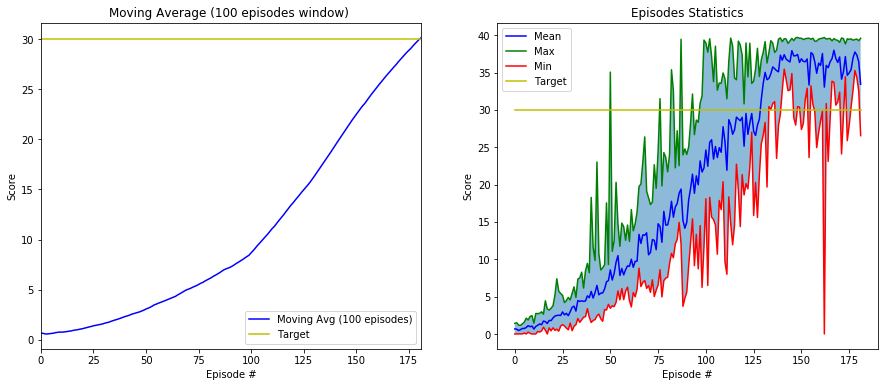

In [16]:
# Plot the result
plot_result(scores)

### Testing the trained model

Let's load the saved agent and run a single episode to see how trained model behaves.

In [13]:
# Load the saved trained agent
agent = Agent.load(env)

In [14]:
single_episode_scores = run_single_episode(env, brain_name, agent, train_mode=False)

print(f'Total score (averaged over agents) this episode: {np.mean(single_episode_scores)}')
print(f'Each agent scores: \n{single_episode_scores}')

Total score (averaged over agents) this episode: 32.42049927534536
Each agent scores: 
[29.94999933 30.91999931 37.80999915 26.24999941 31.97999929 28.37999937
 32.97999926 35.8099992  28.59999936 38.65999914 38.38999914 35.34999921
 38.16999915 36.34999919 31.90999929 22.4899995  22.1799995  37.82999915
 26.41999941 37.97999915]


### Closing the Environment

When finished, you can close the environment.

In [13]:
env.close()

### Ideas for Future Work

The training speed can be improved if a parallel model was used like the Distributed Distributional Deterministic Policy Gradients (D4PG) model. This model can execute many agents simultaneously (multiprocessing) and syncronize/updates the network's weights after some period.